2.1.0
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________
78/78 - 0s - loss: 6.2789 - mae: 1.9891 - mse: 6.2789
테스트 세트의 평균 절대 오차:  1.99 MPG


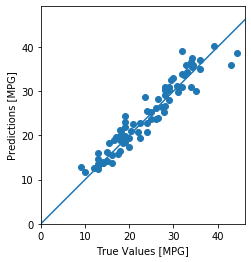

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

train_dataset = pd.read_csv('../data/mpg_trainset.csv',index_col=0) 
test_dataset = pd.read_csv('../data/mpg_testset.csv',index_col=0)

test_labels = pd.read_csv('../data/mpg_testlabels.csv', header=None, index_col=0)

# 가중치와 옵티마이저를 포함하여 정확히 동일한 모델을 다시 생성합니다
model = keras.models.load_model('../models/mpg_model.h5')
model.summary()

loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)
print("테스트 세트의 평균 절대 오차: {:5.2f} MPG".format(mae))

# 모델로 부터 예측 - 테스트데이터셋 사용
test_predictions = model.predict(test_dataset).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [3]:
# 새로운 값으로 예측
# mpg 15.0 이 나오면 best
new_data = pd.DataFrame([[ 1.48388718, 1.86598835, 2.23462028, 1.01878165, -2.53089071, -1.60464169, 0.77467638, -0.46514837, -0.49522541]])
# new_data = pd.DataFrame([[ 2.122388718, 1.86598835, 3.23462028, 1.91878165, -1.53089071, -1.80464169, 0.77467638, -0.56514837, -0.29522541]])
model.predict(new_data).flatten()

array([12.627973], dtype=float32)